In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
labels = []
with open("breast-cancer.labels") as f:
    for line in f:
        labels.append(line.replace("\n",""))

In [3]:
train_data = pd.io.parsers.read_csv(filepath_or_buffer="breast-cancer-train.dat", names=labels)
train_data.loc[[0]]

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [4]:
validate_data = pd.io.parsers.read_csv(filepath_or_buffer="breast-cancer-validate.dat", names=labels)
validate_data.loc[[0]]

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,892438,M,19.53,18.9,129.5,1217.0,0.115,0.1642,0.2197,0.1062,...,25.93,26.24,171.1,2053.0,0.1495,0.4116,0.6121,0.198,0.2968,0.09929


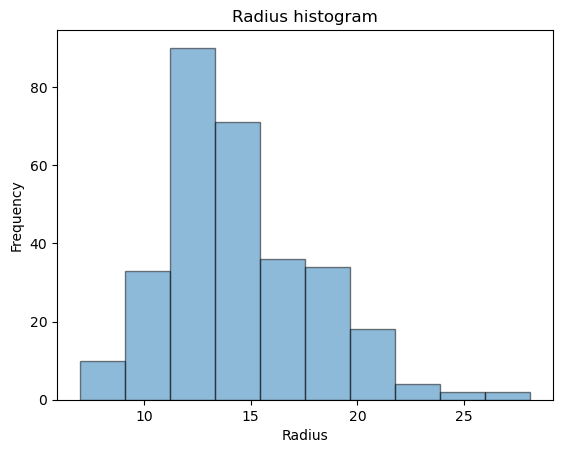

In [5]:
plt.title("Radius histogram")
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.hist(train_data["radius (mean)"], ec="black", alpha=.5)
plt.show()

In [6]:
lin_labels = ["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]
print(*lin_labels, sep="\n")

radius (mean)
perimeter (mean)
area (mean)
symmetry (mean)


In [7]:
train_matrix_lin = np.matrix(train_data[lin_labels])
train_matrix_lin

matrix([[1.799e+01, 1.228e+02, 1.001e+03, 2.419e-01],
        [2.057e+01, 1.329e+02, 1.326e+03, 1.812e-01],
        [1.969e+01, 1.300e+02, 1.203e+03, 2.069e-01],
        ...,
        [1.176e+01, 7.500e+01, 4.311e+02, 1.619e-01],
        [1.426e+01, 9.122e+01, 6.331e+02, 1.635e-01],
        [1.051e+01, 6.685e+01, 3.342e+02, 1.695e-01]])

In [8]:
validate_matrix_lin = np.matrix(validate_data[lin_labels])

In [9]:
quad = PolynomialFeatures(degree=2, include_bias=False)
quad.feature_names_in = lin_labels

In [10]:
train_matrix_quad = np.matrix(quad.fit_transform(np.asarray(train_matrix_lin)))

In [11]:
validate_matrix_quad = np.matrix(quad.fit_transform(np.asarray(validate_matrix_lin)))

In [12]:
quad_labels = quad.get_feature_names_out(lin_labels).tolist()
print(*quad_labels, sep="\n")

radius (mean)
perimeter (mean)
area (mean)
symmetry (mean)
radius (mean)^2
radius (mean) perimeter (mean)
radius (mean) area (mean)
radius (mean) symmetry (mean)
perimeter (mean)^2
perimeter (mean) area (mean)
perimeter (mean) symmetry (mean)
area (mean)^2
area (mean) symmetry (mean)
symmetry (mean)^2


In [13]:
b_train = np.where(train_data["Malignant/Benign"] == "M", [1], [-1])
b_validate = np.where(validate_data["Malignant/Benign"] == "M", [1], [-1])

In [14]:
w_lin = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_matrix_lin.T, train_matrix_lin)), train_matrix_lin.T), np.matrix(b_train).T)
w_lin

matrix([[-1.13805949e+00],
        [ 1.67513623e-01],
        [ 1.64742308e-03],
        [-2.61582982e+00]])

In [15]:
w_quad = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_matrix_quad.T, train_matrix_quad)), train_matrix_quad.T), np.matrix(b_train).T)
w_quad

matrix([[-1.10289314e+00],
        [-4.64857667e-02],
        [ 2.06239401e-02],
        [ 3.39810344e+01],
        [-9.00483113e-01],
        [ 3.29273060e-01],
        [-2.73043991e-03],
        [-1.89181327e+01],
        [-2.81764869e-02],
        [ 2.85829220e-04],
        [ 3.21386440e+00],
        [ 2.20689632e-06],
        [-3.56902645e-02],
        [-9.64051177e+01]])

In [16]:
cond_lin = np.linalg.cond(train_matrix_lin) ** 2
cond_lin

828804275.0196037

In [17]:
cond_quad = np.linalg.cond(train_matrix_quad) ** 2
cond_quad

9.056816679082345e+17

In [18]:
lin_test_vec = np.array(np.sign(np.matmul(validate_matrix_lin, w_lin).T))[0]
lin_test_vec

array([ 1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
        1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1

In [19]:
quad_test_vec = np.array(np.sign(np.matmul(validate_matrix_quad, w_quad).T))[0]
quad_test_vec

array([ 1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.,
        1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1

In [20]:
lin_correct = len(np.asarray(np.sign(lin_test_vec) == np.sign(b_validate)).nonzero()[0])
lin_correct

245

In [21]:
lin_false_positive = len(np.asarray(lin_test_vec > b_validate).nonzero()[0])
lin_false_negative = len(np.asarray(lin_test_vec < b_validate).nonzero()[0])
print("Linear:")
print("False positive:", lin_false_positive)
print("False negative:", lin_false_negative)

Linear:
False positive: 8
False negative: 7


In [22]:
quad_correct = len(np.asarray(np.sign(quad_test_vec) == np.sign(b_validate)).nonzero()[0])
quad_correct

240

In [23]:
quad_false_positive = len(np.asarray(quad_test_vec > b_validate).nonzero()[0])
quad_false_negative = len(np.asarray(quad_test_vec < b_validate).nonzero()[0])
print("Quadratic:")
print("False positive:", quad_false_positive)
print("False negative:", quad_false_negative)

Quadratic:
False positive: 15
False negative: 5
